# Практический пример применения линейной регрессии

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Для прямой загрузки датасетов с kaggle, необходимо получить API токен.

Для этого заходите на kaggle в настройки аккаунта и сгенерируйте свой API токен.
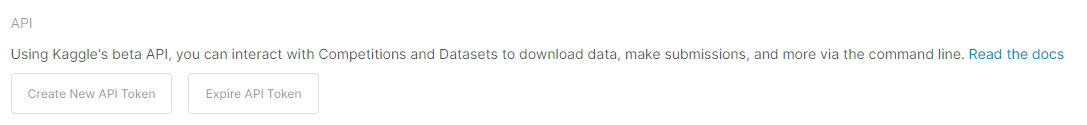

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
  
od.download("https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv")

100%|██████████| 199k/199k [00:00<00:00, 25.7MB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [ ]:
import pandas as pd

df = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Работа с пропусками

Существует две основные стратегии работы с пропусками:
- удаление объектов или признаков, содержащих пропуски;
- заполнение пропусков:
    - заполнение средним значением/медианой/модой по всему признаку;
    - заполнение средним значением/медианой/модой по агреггированому признаку;
    - заполнение пропусков, использую модель машинного обучения;
    -  заполнение пропусков из предыдущей строки или следующей строки (используя метод ffill или bfill);
    - замена методом интерполяции;
    - SimpleImputer(), KNNInputer().

In [ ]:
df_nan = df.loc[:, df.isnull().any()]
df_nan

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [ ]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
# посмотрим процент пропущенных значений
df_nan.isnull().sum() / len(df_nan) * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Видим, что есть столбцы, в которых больше 80% пропупосков,такие переменные лучше в целом удалить, так как заполнение может привести в дальнейшем только к ухудшению результата.

In [ ]:
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis = 1)

In [ ]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
# df["MasVnrArea"] = df["MasVnrArea"].replace(np.nan, 0)

In [ ]:
#using mean
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
# using median
# df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

In [ ]:
df.MasVnrType.replace('None', np.nan, inplace=True)

In [ ]:
df["MasVnrType"].value_counts()

BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
df["MasVnrType"].fillna('BrkFace', inplace=True)

In [ ]:
df["GarageFinish"].mode()[0]

'Unf'

In [ ]:
# using mode
df["GarageFinish"].fillna(df["GarageFinish"].mode()[0], inplace=True)

In [ ]:
# using ffill method
df["GarageType"] = df["GarageType"].fillna(method='ffill')
# OR
# using bfill method
df["Electrical"] = df["Electrical"].fillna(method='bfill')

In [ ]:
df["GarageYrBlt"].interpolate(method="linear", direction = "forward", inplace=True)

In [ ]:
for col in df.loc[:, df.isnull().any()].columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df = df.select_dtypes(include=np.number)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Масштабирование данных

**Масштабирование признаков**

Масштабированием называется общий процесс изменения диапазона признака. Это необходимый шаг, потому что признаки измеряются в разных единицах, а значит покрывают разные диапазоны. 

*Например, столбцы возраста и месячной зарплаты будут иметь совершенно разный диапазон.*

Это сильно искажает результаты таких алгоритмов, как *метод опорных векторов* и *метод k-ближайших соседей*, которые учитывают расстояния между измерениями. А масштабирование позволяет этого избежать. И хотя методы вроде *линейной регрессии* и *«случайного леса»* не требует масштабирования признаков, лучше не пренебрегать этим этапом при сравнении нескольких алгоритмов.

**Существует два распространенных способа масштабирования:**

1. **Нормализация**

В данном случае все значения будут находиться в диапазоне от 0 до 1. Дискретные бинарные значения определяются как 0 и 1. 

Расчёт нового значения происходит по формуле:

$X_{norm} = \frac{X-X_{min}}{X_{max}-X_{min}}$


2. **Стандартизация**

Масштабирует значения с учетом стандартного отклонения. Если стандартное отклонение функций другое, их диапазон также будет отличаться друг от друга. Это снижает влияние выбросов в элементах. В следующей формуле стандартизации среднее значение показано как $μ$, а стандартное отклонение показано как $σ$.

$X_{std} = \frac{X-μ}{σ}$

Стандартизация приводит все исходные значения набора данных, независимо от их начальных распределений и единиц измерения, к набору значений из распределения с **нулевым средним значением** и **единичным стандартным отклонением**. 

Пакет `sklearn.preprocessing` содержит в себе множество различных функции предобработки данных, в том числе функции, позволяющие выполнять масштабирование признаков:

- **StandardScaler()** - класс для стандартизации
- **MinMaxScaler()** - класс для нормализации

In [ ]:
df = df.select_dtypes(include=np.number)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
X = df.drop(columns=['SalePrice', 'Id'])
y = df['SalePrice']

In [ ]:
print(f'Features size: {X.shape}')
print(f'Target size: {y.shape}')

Features size: (1460, 36)
Target size: (1460,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()

X_std = std.fit_transform(X)

X_std = pd.DataFrame(X_std, columns=X.columns)
X_std

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,6.092188,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [ ]:
X_std.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,0.000000,-8.455945e-17,4.075887e-16,-5.840077e-17,1.387018e-16,3.540547e-16,1.046347e-15,4.496860e-15,-3.893385e-17,-2.433366e-17,...,-1.216683e-17,5.596741e-17,3.041707e-17,-2.311697e-17,4.866731e-18,5.475072e-17,1.946692e-17,-2.676702e-17,7.543433e-17,3.567436e-14
std,1.000343,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.730865,-8.725628e-01,-2.227875e+00,-9.237292e-01,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.689368e+00,-5.707501e-01,-9.730182e-01,...,-2.212963e+00,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.969111e+00,-1.367655e+00
25%,-0.865432,-8.725628e-01,-4.564744e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.719226e-01,-8.656586e-01,-5.707501e-01,-9.730182e-01,...,-6.479160e-01,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-4.891101e-01,-6.144386e-01
50%,0.000000,-1.631095e-01,6.454645e-16,-1.040633e-01,-7.183611e-02,-5.171998e-01,5.737148e-02,4.425864e-01,-5.707501e-01,-1.319022e-01,...,3.284429e-02,-7.521758e-01,-3.270298e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.191097e-01,1.387775e-01
75%,0.865432,3.098594e-01,4.065156e-01,1.087080e-01,6.514792e-01,3.817427e-01,9.516316e-01,9.271216e-01,3.383686e-01,5.891327e-01,...,4.820057e-01,5.886506e-01,3.221901e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,6.208910e-01,8.919936e-01
max,1.730865,3.147673e+00,1.103492e+01,2.051827e+01,2.821425e+00,3.078570e+00,1.282839e+00,1.217843e+00,8.285201e+00,1.140575e+01,...,4.421526e+00,6.087635e+00,7.554198e+00,8.675309e+00,1.721723e+01,8.341462e+00,1.830618e+01,3.116527e+01,2.100892e+00,1.645210e+00


In [ ]:
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=X.columns)

X_norm.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.217043,0.167979,0.043080,0.566591,0.571918,0.719332,0.581096,0.064448,0.078604,0.031580,...,0.333554,0.109970,0.085302,0.039772,0.006712,0.031377,0.003738,0.002806,0.483811,0.453938
std,0.248827,0.075425,0.046653,0.153666,0.139100,0.218862,0.344090,0.112957,0.080811,0.109443,...,0.150779,0.146253,0.121126,0.110723,0.057711,0.116161,0.054441,0.032008,0.245784,0.332024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.029229,0.444444,0.500000,0.594203,0.283333,0.000000,0.000000,0.000000,...,0.235896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000
50%,0.176471,0.167979,0.038227,0.555556,0.500000,0.731884,0.733333,0.000000,0.067948,0.000000,...,0.338505,0.000000,0.045704,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000
75%,0.294118,0.198630,0.048150,0.666667,0.625000,0.927536,0.900000,0.102656,0.126196,0.000000,...,0.406206,0.196033,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Разделение данных

Одна из целей построения алгоритмов машинного обучения, постоить такую модель, которая будет способная также хорошо работать с новыми данными, которых она не видела до этого, как и с теми данными на которых обучалась.

Это называется **обобщающей способностью** моделей.

**Обобщающая способность** — это способность аналитической модели, построенной на основе машинного обучения (нейронной сети, дерева решений, карты Кохонена и др.) выдавать правильные результаты не только для примеров, участвовавших в процессе обучения, но и для любых новых, которые не участвовали в нем.

Именно поэтому при обучении модели, существующий набор данных разделяют на подвыборки:
- **тренировочную (train)** - набор данных на которых мы обучаем нашу модель
- **тестовую (test)** - это набор данных, которые мы не использовали для обучения нашей модели, т. е. это данные которые не видела наша модель. Набор данных используется для тестирования и оценки модели.

***Таким образом разделение данных на обучающую и тестовую выборки позволяет имитировать работу модели на новых/неизвестных данных.***


К тому же при использовании одних и тех же данных может возникнуть **Переобучение** — это термин, используемый для описания того, когда модель изучила эту взаимосвязь «слишком хорошо» для обучающих данных.

Под «слишком хорошо» мы подразумеваем скорее то, что он слишком близко изучил взаимосвязь — что он видит больше тенденций/корреляций/связей, чем существует на самом деле.

**Существует две основных стратегий разделения данных на подвыборки:**
1. отложенная выборка: разделение данных на две части (train и test)
2. Кроссвалидация

**Отложенная выборка**

Данный подход эффективен при большом количестве данных, при маленьких размерах выборки может возникнуть множество различных проблем.

В библиотеки sklearn реализован метод позволяющий осуществить данное разбиение:

`from sklearn.model_selection import train_test_split`

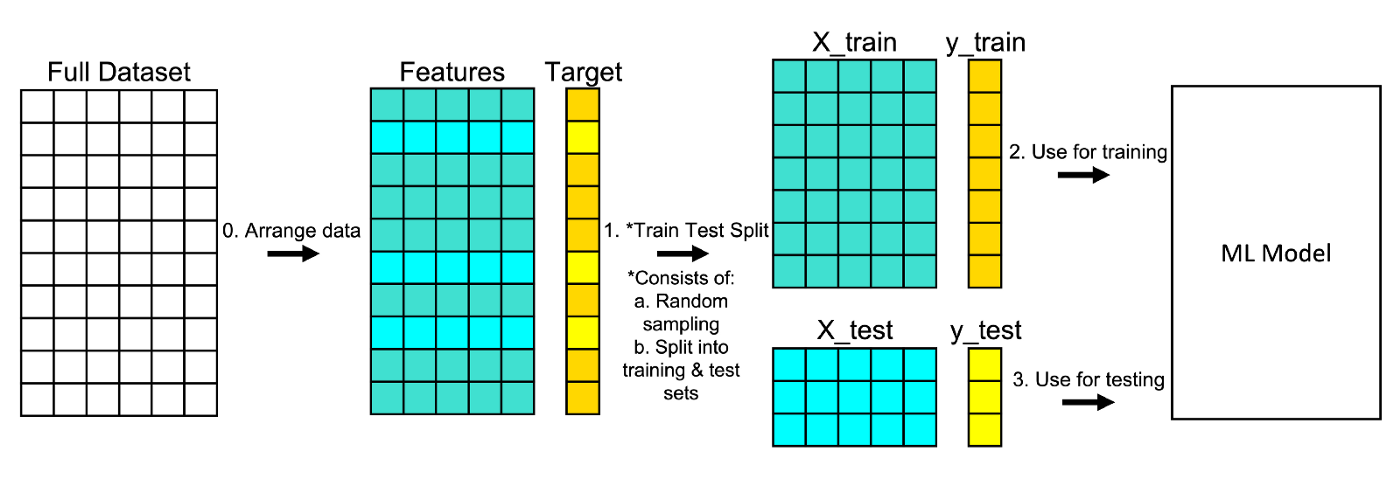

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.15, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (1241, 36), (1241,)
Train dataset size: (219, 36), (219,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics 

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", model.score(X_test, y_test))

MAE 23128.41308857478
MSE 1476961372.0681744
R2 Score: 0.8180760944982401


In [ ]:
# Создадим массив названия признаков
features = X.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df.sort_values(by='Coefficient')

,Coefficient,features
11,-9.328696e+16,TotalBsmtSF
12,-8.619111e+16,1stFlrSF
13,-4.084090e+16,2ndFlrSF
14,-1.131283e+16,LowQualFinSF
20,-7.013047e+04,BedroomAbvGr
0,-3.346136e+04,MSSubClass
1,-3.126936e+04,LotFrontage
21,-2.775055e+04,KitchenAbvGr
32,-1.799366e+04,PoolArea
33,-8.972948e+03,MiscVal


In [ ]:
y_pred

array([154434.5125463 , 310613.06097271, 111574.16713053, 179323.04877403,
       297291.38997442,  48678.41938548, 231672.91746201, 148088.76445872,
        48490.30168621, 150344.26783572, 153915.22390025, 114515.33620608,
        77806.54267492, 212334.93064456, 188695.00360364, 140601.20224369,
       211145.29410515, 137049.20716124, 117198.26532562, 233977.73026829,
       182423.31904454, 210698.6648852 , 188460.57693291, 129845.32249756,
       210750.07605697, 149883.23617107, 198263.55952993,  78114.16515302,
       178516.73402527, 183982.21653322, 116041.31516342, 271478.79999594,
       227064.68544439,  86869.76497822, 267761.04832692, 161073.65857346,
       149519.98586855, 216098.34744927, 304100.3727297 ,  87707.45647713,
       136029.45931216, 246720.62289159, 106074.97225747, 278778.71573093,
       128314.89955076, 128547.62489129, 105280.03937387, 128529.97910998,
       362393.50222826, 130096.97766879, 107791.23668279, 216200.16381669,
        88627.81016878, 3

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.15, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("Score:", model.score(X_test, y_test))

MAE 23166.87306452114
MSE 1480640787.4975183
Score: 0.8176228845243515


**Кроссвалидация**

Это метод, используемый для обучения и оценки модели машинного обучения с использованием нескольких частей набора данных. Это означает, что вместо того, чтобы разбивать набор данных только на две части, одну для обучения и другую для тестирования, набор данных делится на большее количество подвыборок.

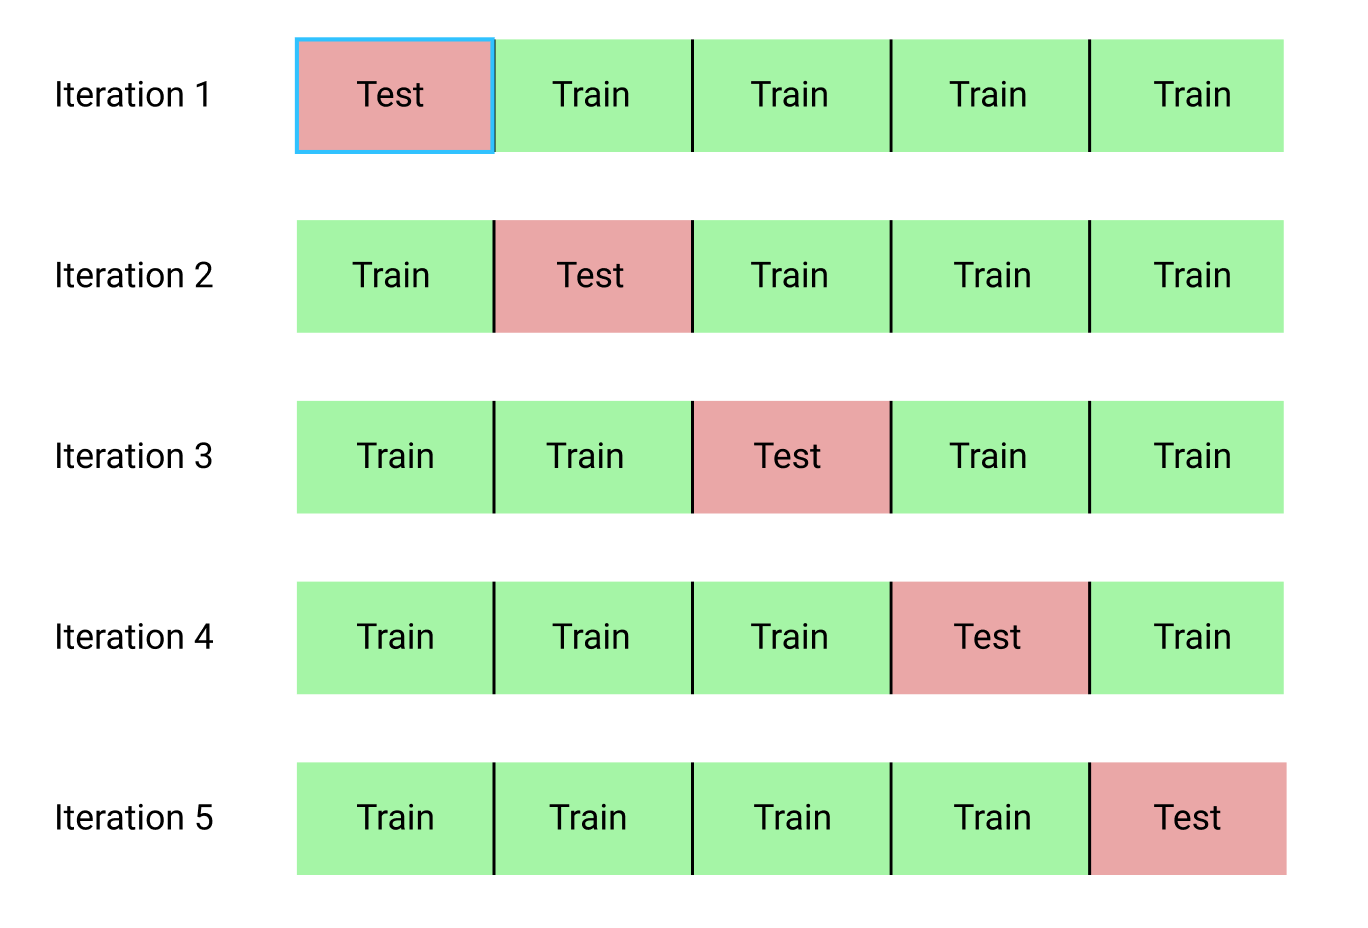

Выборка разбивается на k непересекающихся подмножеств, и каждое из них по очереди выступает в качестве контрольной выборки (а остальные k − 1 частей — в качестве обучающей выборки). В качестве результата выдается средняя ошибка по всем контрольным выборкам.

Значение k должно быть тщательно выбрано для выборки данных.

Плохо выбранное значение для k может привести к неправильному представлению о качестве модели, например, к оценке с высокой дисперсией (которая может сильно измениться на основе данных, используемых в соответствии с моделью), или к высокой предвзятости (например, переоценка качества модели).

k выбирают обычно 5 или 10, но нет формального правила. По мере того как k становится больше, разница в размере между тестовой выборкой и подмножествами resampling становится мала. По мере уменьшения этой разницы предвзятость к технике становится меньше.


**В библиотеки sklearn также реализован метод кросс валидации:**

```
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
```

Конструктор выглядит следующим образом:

`sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)`

где:
- estimator - модель машинного обучения
- X - вектор признаков
- y - вектор целевой переменной
- scoring - оценка модели
- cv - количество фолдов (подвыборок)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds for cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X, y, cv=kf, scoring='r2')
scores

array([0.82242294, 0.80656743, 0.36963931, 0.84912606, 0.86890627])

In [ ]:
mean_score = np.mean(scores)
mean_score

0.7433324038258269